## out_cat comparison
Let's now compare the **out_cast** that we get with the one given by *Battaglia*

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
path = '../Data/'
dataPath = 'sextans/'

mt = Table.read(path+'utils/master_table_edr3_final.txt',format='ascii')
it = np.where((mt['name']=='Sextans'))
mt = mt[it]
output = Table.read(path+dataPath+'/out_cat/out_test_2rh_Sextans_eDR3.fits', format='fits')
output0 = Table.read(path+dataPath+'/out_test_Sextans_eDR3_2rh.fits', format='fits')

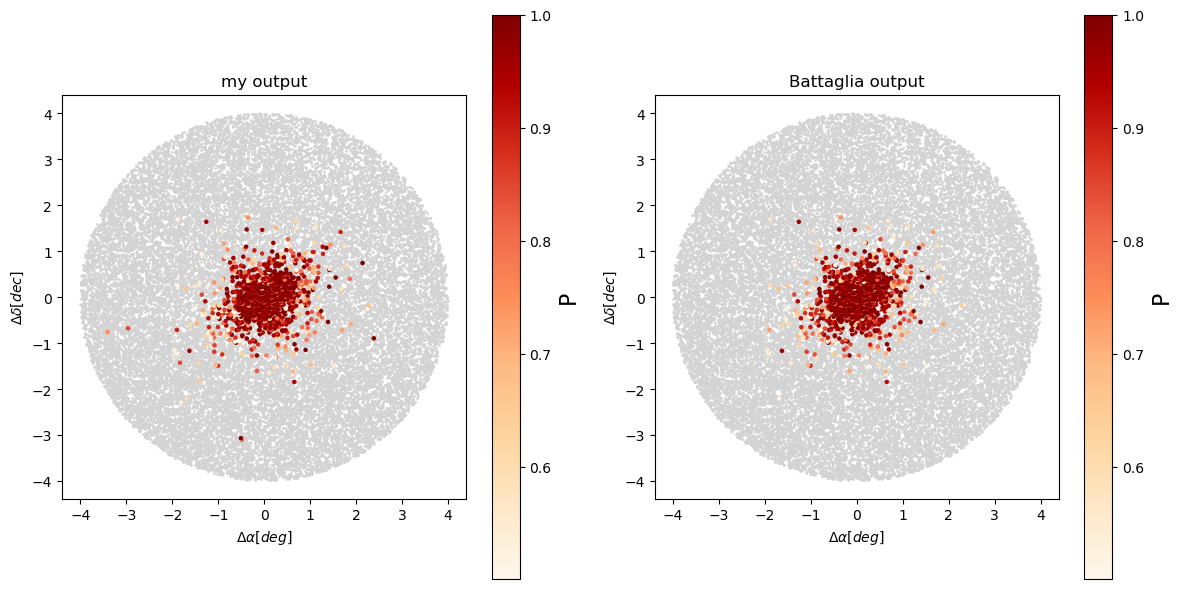

In [3]:
output_sextans_members = output[output['P'] >= 0.5]
output0_sextans_members = output0[output0['P'] >= 0.5]

# fontsize
fsize = 14

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter((output['ra'] - mt['ra'][0]), (output['dec'] - mt['dec'][0]), c='lightgray', s=1)
cs1 = ax1.scatter((output_sextans_members['ra'] - mt['ra'][0]), (output_sextans_members['dec'] - mt['dec'][0]), 
            c=output_sextans_members['P'], cmap='OrRd', s=5)
ax1.set_xlabel(r'$\Delta \alpha [deg]$')
ax1.set_ylabel(r'$\Delta \delta [dec]$')
ax1.set_title('my output')
ax1.set_aspect('equal')
cbar = fig.colorbar(cs1)
cbar.ax.set_ylabel('P',fontsize=fsize+2)

ax2.scatter((output0['ra'] - mt['ra'][0]), (output0['dec'] - mt['dec'][0]), c='lightgray', s=1)
cs2 = ax2.scatter((output0_sextans_members['ra'] - mt['ra'][0]), (output0_sextans_members['dec'] - mt['dec'][0]), 
            c=output0_sextans_members['P'], cmap='OrRd', s=5)
ax2.set_xlabel(r'$\Delta \alpha [deg]$')
ax2.set_ylabel(r'$\Delta \delta [dec]$')
ax2.set_title('Battaglia output')
ax2.set_aspect('equal')
cbar = fig.colorbar(cs2)
cbar.ax.set_ylabel('P',fontsize=fsize+2)

plt.tight_layout()
fig.savefig(path+dataPath+'Comparison_plots/sextans_members_2rh.jpeg', bbox_inches='tight', dpi=150)

let's see $\Delta P$ between mine and the one given by Battaglia

In [4]:
delta_probability = []

inter, ia, ib = np.intersect1d(np.int64(output['source_id'].data), np.int64(output0['source_id'].data), return_indices=True)

filtered_output = output[ia]

print('number of sources (rows) in Battaglia file: ',len(output0))
print('number of sources (rows) in my file: ',len(output))
print('number of sources (rows) in my file after selection: ',len(filtered_output))
print('type of inter: ',type(filtered_output['P'].data[0]))



number of sources (rows) in Battaglia file:  32388
number of sources (rows) in my file:  32429
number of sources (rows) in my file after selection:  32388
type of inter:  <class 'numpy.float64'>


In [5]:
# Find common source_ids between the two tables
common_source_ids, ia, ib = np.intersect1d(np.int64(output0['source_id'].data), np.int64(filtered_output['source_id'].data), return_indices=True)

# Get the P values for these common source_ids
prob_output0 = output0['P'][ia]
prob_output = filtered_output['P'][ib]

# Calculate delta probabilities
delta_probability = prob_output - prob_output0

# Print the results
print(f"Common source IDs: {common_source_ids}")
print(f"Delta probabilities: {delta_probability}")

Common source IDs: [3773716978192801664 3773728587489525504 3773728896727175680 ...
 3856211613342521856 3856230579918177536 3856278717911927040]
Delta probabilities:            P           
-----------------------
 1.3446019703163172e-31
 3.971085472273184e-291
  7.234899259939353e-08
 1.4093829231626764e-59
   6.61558788772218e-17
  3.901447696332461e-54
 -1.896688301563827e-21
-1.2069181763045152e-08
 -4.539005496945994e-21
  1.956679039530865e-15
                    ...
-1.9865617135754314e-23
    5.3372595494879e-25
  2.925586843581888e-09
3.3489749936090194e-168
 2.3477658026576725e-30
                    0.0
  2.129734803266765e-11
 2.5804454596540597e-17
-6.6020895667256475e-06
-2.4784225498061357e-05
Length = 32388 rows


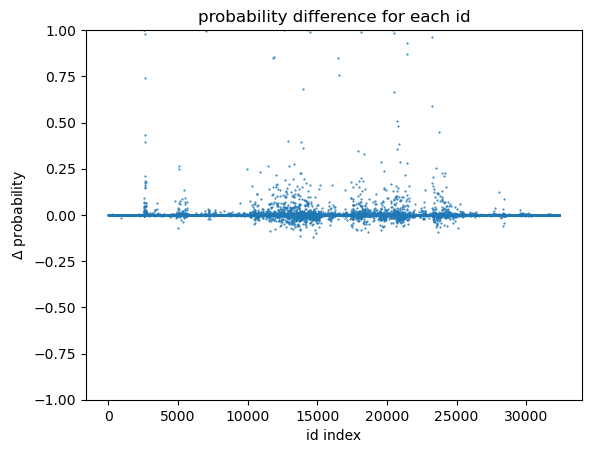

In [6]:
fig, ax = plt.subplots()
ax.plot(np.arange(0, len(delta_probability), 1), delta_probability, '.', markersize=1)
ax.set_ylim(-1, 1)
ax.set_xlabel('id index')
ax.set_ylabel(f'$\Delta$ probability')
ax.set_title('probability difference for each id')
fig.savefig(path+dataPath+'Comparison_plots/sextans_probability_difference_2rh.jpeg', bbox_inches='tight', dpi=150)

Let's make a hist

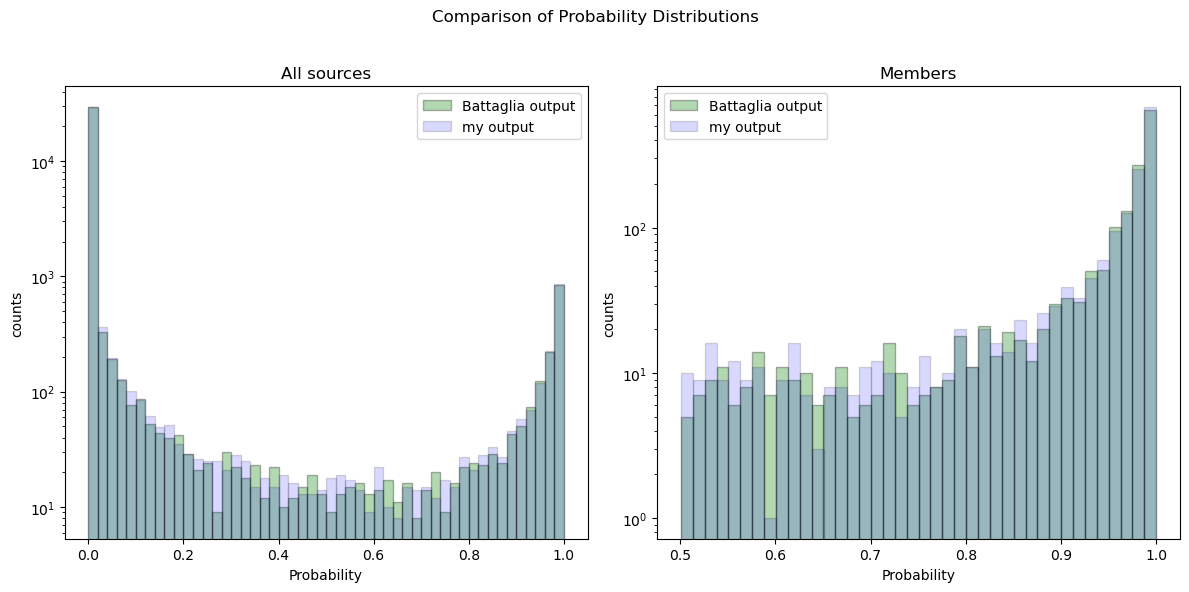

In [7]:
output0_members = output0[output0['P'] >= 0.5]
output_members = filtered_output[filtered_output['P'] >= 0.5]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(output0['P'], bins=50, density=False, alpha=0.3, color='g', edgecolor='black', label='Battaglia output')
ax1.hist(filtered_output['P'], bins=50, density=False, alpha=0.15, color='blue', edgecolor='black', label='my output')
ax1.set_yscale('log')
ax1.set_xlabel('Probability')
ax1.set_ylabel('counts')
ax1.set_title('All sources')
ax1.legend()

ax2.hist(output0_members['P'], bins=40, density=False, alpha=0.3, color='g', edgecolor='black', label='Battaglia output')
ax2.hist(output_members['P'], bins=40, density=False, alpha=0.15, color='blue', edgecolor='black', label='my output')
ax2.set_yscale('log')
ax2.set_xlabel('Probability')
ax2.set_ylabel('counts')
ax2.set_title('Members')
ax2.legend()

fig.suptitle('Comparison of Probability Distributions')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
fig.savefig(path+dataPath+'Comparison_plots/sextans_probability_distribution_2rh.jpeg', bbox_inches='tight', dpi=150)

We can see that we don't have the exact probability of membership for the same object